In [1]:
# conda install -c conda-forge librosa 
# https://anaconda.org/conda-forge/librosa

https://librosa.github.io/librosa/tutorial.html

In [2]:
# Feature extraction example
import numpy as np
import librosa
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the example clip
y, sr = librosa.load(librosa.util.example_audio_file())

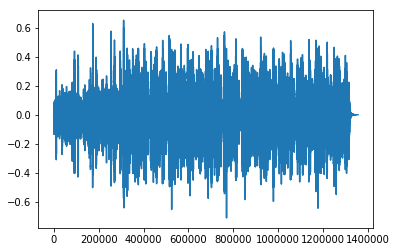

In [4]:
plt.plot(y)

In [5]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr)

In [6]:
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

In [7]:
import pandas as pd
pd.DataFrame(beat_features)

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0.310993,0.169854,0.166982,0.257548,0.172388,0.264087,0.386181,0.144057,0.257201,0.274575,...,0.201022,0.106245,0.308395,0.144245,0.122820,0.551947,0.203321,0.106265,0.277375,0.173058
1,0.270216,0.097194,0.121543,0.278115,0.089782,0.107371,0.214517,0.097452,0.165318,0.205195,...,0.183362,0.085096,0.207804,0.240739,0.133666,0.552972,0.196313,0.086235,0.145730,0.202820
2,0.482229,0.142481,0.163844,0.378889,0.102756,0.096419,0.134799,0.108007,0.277769,0.373025,...,0.170637,0.058082,0.075823,0.258030,0.124380,0.673327,0.167322,0.055749,0.078172,0.158263
3,0.743373,0.667615,0.675773,0.715447,0.641256,0.664489,0.617990,0.653474,0.726815,0.811716,...,0.179974,0.094967,0.091603,0.646152,0.658962,0.456541,0.147506,0.101183,0.072846,0.650174
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.223364,0.134595,0.134573,1.000000,1.000000,0.316462,0.199359,0.157324,0.114312,1.000000
5,0.834592,0.443052,0.482927,0.591288,0.452845,0.409924,0.459490,0.451640,0.510536,0.533133,...,0.413571,0.140908,0.177541,0.426562,0.496944,0.167649,0.375526,0.146593,0.174278,0.498892
6,0.454900,0.058400,0.088451,0.227027,0.052108,0.075529,0.142234,0.062531,0.199823,0.208487,...,0.694535,0.179019,0.172331,0.042950,0.065381,0.127248,0.705509,0.188954,0.205266,0.098353
7,0.315932,0.062205,0.098637,0.247252,0.051796,0.072458,0.104981,0.052264,0.164605,0.196345,...,1.000000,0.284710,0.145202,0.041505,0.035482,0.066717,1.000000,0.284378,0.186898,0.067075
8,0.139059,0.060186,0.086674,0.176591,0.054398,0.080965,0.089587,0.050767,0.100215,0.119083,...,0.610282,0.930903,0.230416,0.033559,0.023928,0.085435,0.584167,0.924936,0.330331,0.047167
9,0.075097,0.034974,0.038529,0.104607,0.031077,0.066675,0.072796,0.033646,0.049449,0.076051,...,0.534368,0.995339,0.424104,0.032784,0.022636,0.155785,0.514214,0.996774,0.569407,0.046485


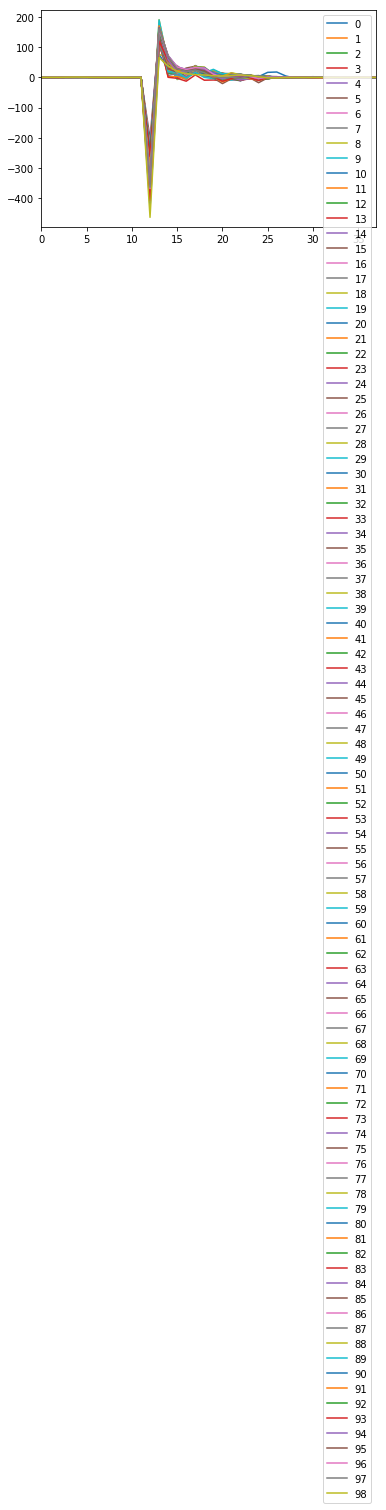

In [8]:
pd.DataFrame(beat_features).plot()